In [1]:
import sys
sys.path.insert(0,'/data/emiln/XLSSU122/analysis/galfit/GalfitPyWrap/')
from GalfitPyWrap import galfitwrap as gf
import os

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import glob
from scipy import ndimage
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.io import ascii
from astropy import wcs
from astropy.table import Table, hstack, join
from __future__ import division
import fnmatch
import multiprocessing as mp
%matplotlib inline

# Make plots readable
# Update plot params
# Make plots readable
params = {'legend.fontsize': 18,
	  'figure.figsize': (6,5),
	 'axes.labelsize': 22,
	 'axes.titlesize':22,
	 'xtick.labelsize':18,
	 'ytick.labelsize':18}
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)
plt.rcParams.update(params)
# plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# plt.rc('text', usetex=True)
# plt.rc('text.latex', preamble=r'\usepackage{cmbright}')
# plt.rcParams.update(params)

/data/emiln/miniconda2/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
# Load in XLSSC122 data

# f140_file = '/data/emiln/XLSSU122/xlssuj0217-0345-f140w_drz_sci.fits'
# f140_file_counts = '/data/emiln/XLSSU122/xlssuj0217-0345-f140w_drz_sci_COUNTS.fits'
# hdu = fits.open(f140_file)
# hdr = hdu[0].header
# data = hdu[0].data
# exptime = hdr['exptime']
# data = data * exptime # convert from CPS to counts
# hdu[0].data = data
# hdu.writeto(f140_file_counts, clobber=True)

In [3]:
# cat_file = '/data/emiln/XLSSU122/xlssc122_F105_F140_redshifts_short_v4_snr_em_member2_by_hand.cat'
# f140_file = '/data/emiln/XLSSU122/xlssuj0217-0345-f140w_drz_sci.fits'
# hdulist = fits.open(f140_file)
# w = wcs.WCS(hdulist[0].header)
# df = pd.read_csv(cat_file,delim_whitespace=True)
# df['X'] = w.wcs_world2pix(df['ra'],df['dec'], 1)[0]
# df['Y'] = w.wcs_world2pix(df['ra'],df['dec'], 1)[1]
# df_members = df[df['member1']>0.5]
# print len(df)
# print len(df_members)
# print df_members.columns.values
# df_members = df_members[df_members['f140_kron']<24]
# print len(df_members)
# # df_members['X'] = w.wcs_world2pix(df_members['ra'],df_members['dec'], 1)[0]
# # df_members['Y'] = w.wcs_world2pix(df_members['ra'],df_members['dec'], 1)[1]
# df_members

In [4]:
df1 = pd.read_csv('/data/emiln/XLSSU122/xlssuj0217-0345-f140w_drz_sci.cat',skiprows=9,delim_whitespace=True,header=0,names=['ID2','ra','dec','mag_auto','magerr_auto','mag_aper']+['g']*5+['magerr_aper']+['g']*5+['fwhm_world','flux_radius','flags'])
nround = 4
df1['ra2']=df1['ra'].round(nround)
df1['dec2']=df1['dec'].round(nround)
df1

/data/emiln/miniconda2/lib/python2.7/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,ID2,ra,dec,mag_auto,magerr_auto,mag_aper,g,g.1,g.2,g.3,...,g.5,g.6,g.7,g.8,g.9,fwhm_world,flux_radius,flags,ra2,dec2
0,1,34.434732,-3.784424,25.0562,0.5988,26.7302,25.5305,25.1879,25.2508,25.0459,...,0.8026,0.6527,0.6681,0.6347,395.4525,0.000108,2.483,0,34.4347,-3.7844
1,2,34.440610,-3.779798,18.2300,0.0164,21.5223,20.2594,19.6950,19.8463,19.3074,...,0.0474,0.0341,0.0375,0.0275,0.0168,0.000144,9.741,1,34.4406,-3.7798
2,3,34.432787,-3.783059,25.0835,0.5150,27.2285,26.0705,25.6338,25.7358,25.3259,...,0.8091,0.6238,0.6561,0.5543,0.8230,0.000111,3.610,0,34.4328,-3.7831
3,4,34.433330,-3.781692,21.6666,0.0870,24.3372,23.1707,22.6357,22.7763,22.2631,...,0.2009,0.1487,0.1603,0.1206,0.0862,0.000116,5.520,0,34.4333,-3.7817
4,5,34.431394,-3.782257,24.1881,0.2679,25.9361,24.8704,24.4859,24.5803,24.2899,...,0.3935,0.3136,0.3345,0.2849,4.0910,0.000085,2.840,0,34.4314,-3.7823
5,6,34.434093,-3.782060,26.6883,0.6003,28.1230,27.0818,26.7702,26.8385,26.6169,...,0.7187,0.6353,0.6298,0.6423,1.8896,0.000098,2.268,0,34.4341,-3.7821
6,7,34.431601,-3.782018,26.3932,0.7481,27.4840,26.7759,26.4438,26.5111,26.4820,...,0.9592,0.8148,0.8236,0.9233,0.3315,0.000051,1.983,0,34.4316,-3.7820
7,8,34.434825,-3.781953,26.5539,0.5753,27.8872,27.0357,26.7563,26.7784,26.6234,...,0.7127,0.6018,0.5961,0.6290,1.3821,0.000065,2.415,0,34.4348,-3.7820
8,9,34.434925,-3.781824,26.7575,0.6731,28.3360,27.3933,27.0080,27.0980,26.7902,...,0.8499,0.7002,0.7315,0.7036,1.6389,0.000092,2.726,0,34.4349,-3.7818
9,10,34.432395,-3.781529,23.8944,0.2912,26.8014,25.5291,24.9352,25.0999,24.4903,...,0.6138,0.4603,0.4943,0.3582,0.3491,0.000272,5.608,0,34.4324,-3.7815


4
33
13
/data/emiln/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


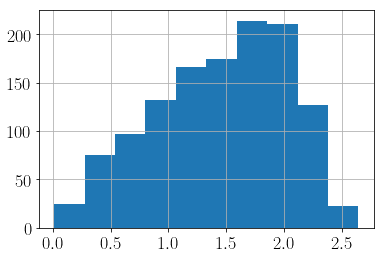

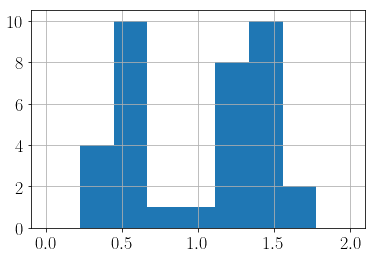

In [5]:
df = pd.read_csv('/data/emiln/XLSSU122/xlssc122_F105_F140_redshifts_short_v4_snr_em_member2_by_hand.cat',delim_whitespace=True)
df['ra1']=df['ra'].round(nround)
df['dec1']=df['dec'].round(nround)
# df = df.merge(df1,left_on='phot-id',right_on='ID',how='inner',suffixes=["","_pc"])
df = df.merge(df1,left_on=['ra1','dec1'],right_on=['ra2','dec2'],how='inner',suffixes=["","_pc"])

df['gold_cluster'] = 0
df['gold_foreground'] = 0
df['silver_cluster'] = 0
df.columns.values
df['(f140)kron'] = df['f140_kron']
for i,r in df.iterrows():
    if (r['member1']>0.5) and (r['(f140)kron']<24 or (r['(f140)kron']<24.5 and r['em-code']==1)):
#         print 'cluster mem'
        df.at[i,'gold_cluster'] = 1
    if (r['member1']<0.5 and r['member1']>0.1) and (r['(f140)kron']<24 or (r['(f140)kron']<24.5 and r['em-code']==1)):
#         print 'cluster mem'
        df.at[i,'silver_cluster'] = 1
    if (r['member2']>0.5) and (r['(f140)kron']<24 or (r['(f140)kron']<24.5 and r['em-code']==1)):
        df.at[i,'gold_foreground'] = 1  
print df['silver_cluster'].sum()
print df['gold_cluster'].sum()
print df['gold_foreground'].sum()
# Compute color for each cluster member
df['color'] = df['f105_0p8'] - df['f140_0p8']
df['F140W'] = df['f140_kron']
df['ID'] = df['phot-id']
# Compute r/r500 for each cluster member
# Cluster Center
cluster_ra = 34.434125
cluster_dec = -3.7587388
r500 = 35 # arcsec
df['r_center'] = np.sqrt((df['ra']-cluster_ra)**2 + (df['dec']-cluster_dec)**2)*3600./r500
df['r_center'].hist()

f140_file = '/data/emiln/XLSSU122/xlssuj0217-0345-f140w_drz_sci.fits'
hdulist = fits.open(f140_file)
w = wcs.WCS(hdulist[0].header)
# df = pd.read_csv(cat_file,delim_whitespace=True)
df['X'] = w.wcs_world2pix(df['ra'],df['dec'], 1)[0]
df['Y'] = w.wcs_world2pix(df['ra'],df['dec'], 1)[1]


members1 = df[df['gold_cluster']==1]
members2 = df[df['gold_foreground']==1]
members1s = df[df['silver_cluster']==1]

members = df[(df['gold_cluster']==1) | (df['silver_cluster']==1)]
plt.show()
members['color'].hist(bins=np.linspace(0,2,10))
# members['F140W'] = members['f140_kron']
# members['ID'] = members['phot-id']
XLSSC122_df = df

In [9]:
XLSSC122_df.columns.values
XLSSC122_df[['ra','dec','ra_pc','flux_radius','F140W','mag_auto','mag_aper','flags']].sort_values('flux_radius')
# print len(XLSSC122_df)

,ra,dec,ra_pc,flux_radius,F140W,mag_auto,mag_aper,flags
1157,34.449003,-3.749802,34.449003,0.638,27.9918,27.9575,27.9677,0
1215,34.445011,-3.741628,34.445011,0.743,27.5532,27.6519,27.6806,0
1196,34.416220,-3.754093,34.416220,0.998,27.2391,27.2329,27.4591,0
1152,34.414507,-3.759371,34.414504,1.091,27.9438,27.5070,27.9041,0
1139,34.418691,-3.743416,34.418691,1.220,27.3518,27.2680,27.6543,0
1091,34.429876,-3.776796,34.429874,1.338,27.7794,27.6424,28.2597,0
855,34.442762,-3.749440,34.442762,1.428,27.9977,27.9781,28.6455,0
976,34.419397,-3.743132,34.419397,1.561,26.9307,26.9946,27.8045,0
708,34.450268,-3.760861,34.450269,1.562,27.7798,27.6501,28.4552,0
1093,34.438808,-3.744558,34.438808,1.588,28.3855,28.0867,28.9445,0


In [10]:
XLSSC122_df.columns.values
tdf = XLSSC122_df[XLSSC122_df['F140W']<24]
tdf[['ra','dec','ra_pc','flux_radius','F140W','mag_auto','mag_aper','flags']].sort_values('flux_radius')

,ra,dec,ra_pc,flux_radius,F140W,mag_auto,mag_aper,flags
110,34.450807,-3.771243,34.450807,1.983,22.9406,22.9510,24.0915,0
80,34.451130,-3.769146,34.451131,2.057,22.4213,22.4503,23.6707,0
167,34.419253,-3.769882,34.419253,2.070,23.4259,23.4015,24.5991,0
142,34.458029,-3.759311,34.458029,2.076,23.2591,23.2674,24.4379,0
136,34.446577,-3.762933,34.446577,2.093,23.7849,23.7986,25.0587,0
240,34.415070,-3.751951,34.415070,2.119,23.8793,23.8734,25.0725,0
137,34.429961,-3.770356,34.429961,2.123,23.9032,23.8618,25.0852,0
129,34.445923,-3.741057,34.445923,2.124,23.6830,23.6871,24.8881,0
92,34.445913,-3.773490,34.445913,2.124,22.7659,22.7538,23.9536,2
134,34.449669,-3.760053,34.449669,2.140,23.8456,23.8482,25.0634,0


In [129]:
members.columns.values

array(['phot-id', 'ra', 'dec', 'f105_kron', 'f105_ekron', 'f105_0p8',
       'f105_e0p8', 'f140_kron', 'f140_ekron', 'f140_0p8', 'f140_e0p8',
       'asec_fwhm', 'zz', 'zlo', 'zhi', 'chi', 'spec-id', 'mcode', 'snr',
       'em-code', 'member1', 'member2', 'ra1', 'dec1', 'gold_cluster',
       'gold_foreground', 'silver_cluster', '(f140)kron', 'color',
       'F140W', 'ID', 'r_center', 'X', 'Y'], dtype=object)

N =  9
1.2634222222222213
N =  8
1.191912499999999
N =  10
0.8119900000000001
N =  8
0.8320874999999992


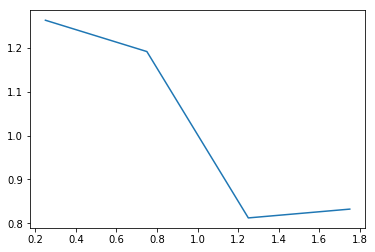

In [7]:
# Line graph of average color in radial bins

r_bins = np.linspace(0,2,5)
r_mid = (r_bins[1:] + r_bins[:-1])/2
# r_bins = [0,0.5,1,1.5,2]
# r_bins = np.logspace(0.1,2,4)
mean_c = []

for i in range(0,len(r_bins)-1):
    rlo = r_bins[i]
    rhi = r_bins[i+1]
    tdf = members[(members['r_center']<rhi) & (members['r_center']>rlo)]
    print "N = ", len(tdf)
    c = tdf['color'].mean()
    print c
    mean_c.append(c)
    
plt.plot(r_mid, mean_c)

In [8]:
from scipy.stats import poisson, binom
import scipy.stats.distributions as dist
def CalcGehrels_Binomial(n,ngal):
    '''
    http://articles.adsabs.harvard.edu/pdf/1986ApJ...303..336G
    https://arxiv.org/pdf/1012.0566.pdf

    Lo Error for k=0 is >0 for some reason, needs fix
    Upper error for some fagn is < fagn
    '''
    try:
            ngal = ngal.astype(int)
    except:
            ngal = int(ngal)
            n = int(n)
    k=n
    n=ngal
    c = 0.683 # 1 sigma 

    print("n:",n)
    print("k:",k)
    print("p:",k/n)

    err_lo = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
    err_hi = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)
    print("err_lo:", err_lo)
    print("err_hi:",err_hi)

    return err_lo, err_hi

N =  12
1.155641666666666
N =  11
1.058663636363636
N =  12
0.8474749999999993
[9 7 5]
[12 11 12]
('n:', array([12, 11, 12]))
('k:', array([9, 7, 5]))
('p:', array([0.75      , 0.63636364, 0.41666667]))
('err_lo:', array([0.59441922, 0.48058123, 0.29661406]))
('err_hi:', array([0.83316874, 0.74958585, 0.56084805]))


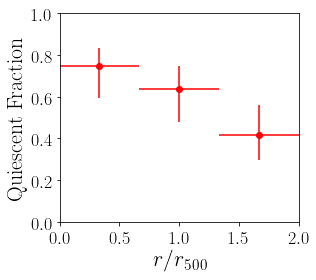

In [13]:
# Quiescent fraction as f(r)
r_bins = np.linspace(0,2,4)
r_mid = (r_bins[1:] + r_bins[:-1])/2
# r_bins = [0,0.5,1,1.5,2]
# r_bins = np.logspace(0.1,2,4)
mean_c = []
nq = []
nt = []

cthresh = 1

for i in range(0,len(r_bins)-1):
    rlo = r_bins[i]
    rhi = r_bins[i+1]
    tdf = members[(members['r_center']<rhi) & (members['r_center']>rlo)]
    print "N = ", len(tdf)
    c = tdf['color'].mean()
    print c
    mean_c.append(c)
    nq.append(len(tdf[tdf['color']>cthresh]))
    nt.append(len(tdf))

nq = np.array(nq)
nt = np.array(nt)
print nq
print nt

qf = nq/nt

err_lo, err_hi = CalcGehrels_Binomial(nq,nt)
plt.figure(figsize=(4.5,4))
plt.errorbar(r_mid, qf,xerr=(r_bins[1]-r_bins[0])/2,yerr=[qf-err_lo,err_hi-qf],fmt='o',color='red')
plt.ylabel('Quiescent Fraction')
plt.xlabel(r'$r/r_{500}$')
plt.ylim(0,1)
plt.xlim(0,2)

plt.tight_layout()
plt.savefig('XLSSC122_QF_2r500.pdf')

### GALFIT SETUP

### LOAD FUNCTIONS AND DATA

In [28]:
ncpu = mp.cpu_count()
print ncpu

8


In [133]:
def run_galfit_cosmos_parallel(row1,OG_df=XLSSC122_df,zp=25,width=90,HLwidth=False,PSFf=1,use_psf=True,\
                               timeout=300,verb=False,psf_file='none',\
                               sigma_file='none',cutout_file='none',\
                               save_name='testsave',\
                              PA_INIT=45, AR_INIT=0.5, MAG_INIT=21,DYNMAG=False, convbox='50 50',
                              constr='none',cutout_width = 200, badmask='none', MAGFIT=False, mag_thresh=5,
                               sky='Default',skyINIT=0.000001, N=0):
#     cutout_width = 200 # ALWAYS KEEP THE SAME, PHYSICAL SIZE OF CUTOUTS FROM DATA_PREP
#     N = 0 # Extra width to search for neighbours in?
#     mag_thresh = 4 # Neighbours only fit if less than mag_thresh fainter than primary
    
    df = OG_df
    r = row1
    ra = r.ra
    dec = r.dec
    ID = int(r['phot-id'])
#     if badmask != 'none':
#         print "Using bad pixel mask..."
#         badmask = tdir+badmask
    if DYNMAG:
        MAG_INIT=np.round(r.F140W,decimals=2)
#         MAG_INIT=np.round(r.F140W_fixed,decimals=2)
        og_mag=MAG_INIT
        print "Initializing",str(ID),"with F140W magnitude:", MAG_INIT
#     pixcrd = full_wcs.wcs_world2pix(ra,dec, 1)
#     print pixcrd
#     X = int(pixcrd[0])
#     Y = int(pixcrd[1])
    X = r.X
    Y = r.Y
    
#     ids_all.append(ID)
    CX = cutout_width
    CY = cutout_width
    
    if MAGFIT:
        magf = 1
    else:
        magf = 0

    print "ID", ID
    print "RA:",ra
    print "DEC:",dec
    print "Initial X:", X
    print "Initial Y:", Y
    print "Cutout X:", CX 
    print "Cutout Y:", CY
    print "Cutout width:", cutout_width

    tdir = '/data/emiln/XLSSU122/analysis/XLSSC122/galfit_results/'+str(ID)
    
    model=[{
    0: 'sersic',              #  object type
    1: str(CX)+' '+str(CY)+' 1 1', #  position x, y
    3: str(MAG_INIT)+' '+str(magf),            #  Integrated magnitude   
    4: '10 1',            #  R_e (half-light radius)   [pix]
    5: '4 1',            #  Sersic index n (de Vaucouleurs n=4) 
    9: str(AR_INIT)+' 1',            #  axis ratio (b/a)  
    10: str(PA_INIT)+' 1',         #  position angle (PA) [deg: Up=0, Left=90]
    'Z': 0                   #  output option (0 = resid., 1 = Don't subtract) 
    }]

    if HLwidth == False:
        bounds = [CX-width,CX+width,CY-width,CY+width]
        bounds2 = [X-width,X+width,Y-width,Y+width]
        print "Cutoutwidth (pixels):", width*2
        print "Cutoutwidth (arcsec):", width*2*0.06
    else: 
        width = int(np.ceil(HLwidth*r.flux_radius))
        print 'r.flux_radius:', r.flux_radius
        bounds = [CX-width,CX+width,CY-width,CY+width]
        bounds2 = [X-width,X+width,Y-width,Y+width]
        print "Cutoutwidth (pixels) for ID",str(ID),":", width*2
        print "Cutoutwidth (arcsec) for ID",str(ID),":", width*2*0.06
        
    print "Bounds:", bounds

    # Find neighbours in full DF
    # Neighbour check needs to be done on original fits image / catalog
    ndf = df[(df['X']>(bounds2[0]-N)) & (df['X']<(bounds2[1]+N)) & (df['Y']>(bounds2[2]-N)) & (df['Y']<(bounds2[3]+N))
             & (df['ID']!=ID)]

    print len(ndf),"NEIGHBOURS FOUND"

    print "Adding additional model components for neighbours..."
    for row in ndf.iterrows():
        r = row[1]
        NX = r.X - X + cutout_width
        NY = r.Y - Y + cutout_width
        if DYNMAG:
            MAG_INIT=np.round(r.F140W,decimals=2)
#             MAG_INIT=np.round(r.F140W_fixed,decimals=2)
            if np.isnan(MAG_INIT):
                MAG_INIT=og_mag # Initialize with MAG of primary target
                print "***NEIGHBOUR MAG NOT CATALOGED***"
            print "NEIGHBOUR initialized with F140W Kron magnitude:", MAG_INIT
            if MAG_INIT > og_mag+mag_thresh:
                print "Neighbour mag too faint, not being fit"
                continue # If mag is too faint, do not fit this object (Should eventually mask these)
                
        seqnr = int(r['ID'])
        model.append({
                0: 'sersic',              #  object type
                1: str(NX)+' '+str(NY)+' 1 1', #  position x, y
                3: str(MAG_INIT)+' '+str(magf),            #  Integrated magnitude   
                4: '10 1',            #  R_e (half-light radius)   [pix]
                5: '4 1',            #  Sersic index n (de Vaucouleurs n=4) 
                9: str(AR_INIT)+' 1',            #  axis ratio (b/a)  
                10: str(PA_INIT)+' 1',         #  position angle (PA) [deg: Up=0, Left=90]
                'Z': 0                   #  output option (0 = resid., 1 = Don't subtract) 
                })


    if use_psf:
        print "Using PSF"
#         O=gf.CreateFile(tdir+cutout_file, bounds, model,fout=tdir+'/input.feedme',\
#                         Pimg=psf_file, Simg=tdir+sigma_file, ZP=zp, scale='0.06 0.06',PSFf=PSFf, convbox=convbox,
#                        constr=constr, badmask=badmask, sky=sky,skyINIT=skyINIT)
        
        O=gf.CreateFile(tdir+cutout_file, bounds, model,fout=tdir+'/input.feedme',\
                Pimg=psf_file, ZP=zp, scale='0.06 0.06',PSFf=PSFf, convbox=convbox,
               constr=constr, badmask=badmask, sky=sky,skyINIT=skyINIT)
        # convbox should be larger than PSF. f125_400 psf is (166,166)
    else:
        O=gf.CreateFile(tdir+cutout_file, bounds, model,fout=tdir+'/input.feedme',\
                        Simg=tdir+sigma_file, ZP=zp, scale='0.06 0.06', PSFf=PSFf, convbox=convbox, constr=constr,
                       badmask=badmask,sky=sky,skyINIT=skyINIT)

    p,oimg,mods,EV,chi2nu=gf.rungalfit(tdir+'/input.feedme',verb=verb, timeout=timeout)
    if EV==124: print "***PROCESS TIMEOUT***"
    bad_result = False
    print '****',ID,'****'
    try: 
        os.rename('out.fits',tdir+'/out_'+save_name+'.fits')
        os.rename('fit.log',tdir+'/fit_'+save_name+'.log')
        os.rename('galfit.01',tdir+'/galfit_'+save_name+'.01')
    except:
        print "***",ID,"Fit failed at GALFIT level***"
        

    try:
#         print "start try"
        print mods
        re_all = mods[0]['1_RE'].split(' ')
        ar_all = mods[0]['1_AR'].split(' ')
        n_all = mods[0]['1_N'].split(' ')
        m_all = mods[0]['1_MAG'].split(' ')
        s_all = mods[-1][str(len(mods))+'_SKY'].split(' ')
#         print "split('') complete"
        re_val = re_all[0].split('*')
        re_err_val = re_all[2].split('*')
        ar_val = ar_all[0].split('*')
        ar_err_val = ar_all[2].split('*')
        m_val = m_all[0].split('*')
        m_err_val = m_all[2].split('*')
        n_val = n_all[0].split('*')
        n_err_val = n_all[2].split('*')
        s_val = s_all[0].split('*')
        s_err_val = s_all[2].split('*')
#         print "split('*') complete"
        
        print re_val
        print re_err_val
        print m_val
        print m_err_val
        print ar_val
        print ar_err_val
        print s_val
        print s_err_val

        if len(re_val)>1:
#             EV+=2**2
            print 'ID',str(ID),'len(re_val)>1', len(re_val)>1

        if len(ar_val)>1:
#             EV+=2**3
            print 'ID',str(ID),'len(ar_val)>1', len(ar_val)>1

        if len(n_val)>1:
#             EV+=2**4
            print 'ID',str(ID),'len(n_val)>1', len(n_val)>1

        if len(m_val)>1:
#             EV+=2**5
            print 'ID',str(ID),'len(m_val)>1', len(m_val)>1
            
        if len(s_val)>1:
#             EV+=2**5
            print 'ID',str(ID),'len(s_val)>1', len(s_val)>1
            
#         print "EV updated for *"
        
        
#         print 'int(np.ceil(len(re_val)/2.)-1)', int(np.ceil(len(re_val)/2.)-1)
        re = float(re_val[int(np.ceil(len(re_val)/2.)-1)])
#         print 're', re
        
#         print 'int(np.ceil(len(re_err_val)/2.)-1)', int(np.ceil(len(re_err_val)/2.)-1)
        re_err = float(re_err_val[int(np.ceil(len(re_err_val)/2.)-1)])
#         print 're_err', re_err
        
#         print int(np.ceil(len(ar_val)/2.)-1)
        ar = float(ar_val[int(np.ceil(len(ar_val)/2.)-1)])
#         print ar
        ar_err = float(ar_err_val[int(np.ceil(len(ar_err_val)/2.)-1)])
#         print ar_err
        n = float(n_val[int(np.ceil(len(n_val)/2.)-1)])
#         print n
        n_err = float(n_err_val[int(np.ceil(len(n_err_val)/2.)-1)])
#         print n_err
        m = float(m_val[int(np.ceil(len(m_val)/2.)-1)])
#         print m
        m_err = float(m_err_val[int(np.ceil(len(m_err_val)/2.)-1)])
    
        s = float(s_val[int(np.ceil(len(s_val)/2.)-1)])
        s_err = float(s_err_val[int(np.ceil(len(s_err_val)/2.)-1)])

                       
    except:
        print "EXCEPTION"
        re_all = [-99,-99,-99]
        ar_all = re_all
        n_all = re_all
        m_all = re_all
        s_all = re_all
        re = float(re_all[0])
        re_err = float(re_all[2])
        ar = float(ar_all[0])
        ar_err = float(ar_all[2])
        n = float(n_all[0])
        n_err = float(n_all[2])
        m = float(m_all[0])
        m_err = float(m_all[2])
        s = float(s_all[0])
        s_err = float(s_all[2])
        EV+=999

    return ID,ra,dec, re, re_err, ar, ar_err, n, n_err, m, m_err, s, s_err, chi2nu, EV
#     return ID,ra,dec, re, ar, n, m, s, chi2nu, EV

In [120]:
def plot_by_ID(ID,save_name=None,cos_df=None,catalog=False):
    if not save_name:
        print 'provide a save_name...'
        return
    tdir = '/data/emiln/XLSSU122/analysis/XLSSC122/galfit_results/'+str(ID)
    
#     ttdf = pd.read_csv('COSMOS_test_galfit_results_'+save_name+'.csv')
    ttdf = pd.read_csv('results/'+save_name+'.csv')
    print 'ID:',ID
    print 'ttdf[ID]',ttdf['ID']
#     print ttdf[ttdf['ID'] == ID]
#     print ID
    try: 
        oimg = fits.open(tdir+'/out_'+save_name+'.fits')
        showme3(oimg)
    except:
        print "No model fit found. Plotting raw image from /cutout.fits"
        try:
            oimg = fits.open(tdir+'/cutout.fits')
            vm = np.percentile(oimg[0].data,99)
            plt.figure()
            plt.subplot(131)
            plt.imshow(oimg[0].data,interpolation='none',cmap='viridis',vmin=1e-4,vmax=vm)
        except:
            print "No cutout.fits file found..."
            oimg = fits.open(tdir+'/data_cps.fits')
            vm = np.percentile(oimg[0].data,99)
            plt.figure(figsize=(5,5))
            plt.subplot()
            plt.imshow(oimg[0].data,interpolation='none',cmap='viridis',vmin=1e-4,vmax=vm)
    if catalog:    
        print '\n ***CATALOG PARAMS***'
        print cos_df[cos_df['NUMBER']==ID][['q','n','re']]
    plt.show()

In [15]:
def summarize_results(galfit_file):
    df2 = pd.read_csv(galfit_file)
    print len(df2[df2['n']==-99])
    df = df2[df2['n']!=-99]

#     plt.hist(cos_df['n'],bins=np.linspace(0,10,20),alpha=0.5,color='blue', label='Catalog')
    plt.hist(df['n'],bins=np.linspace(0,10,20), alpha=0.5,color='red')
    plt.xlabel('Sersic index, n')
    plt.legend()
    plt.show()
#     print np.max(cos_df['n'])

#     plt.hist(cos_df['re'],bins=np.linspace(0,6,30),alpha=0.5,color='blue', label='Catalog')
    plt.hist(df['re']*0.06,bins=np.linspace(0,6,30), alpha=0.5,color='red')
    plt.xlabel('Effective radius (\'\')')
    plt.legend()
    plt.show()

#     plt.hist(cos_df['q'],bins=np.linspace(0,1,20),alpha=0.5,color='blue', label='Catalog')
    plt.hist(df['ar'],bins=np.linspace(0,1,20), alpha=0.5,color='red')
    plt.xlabel('Axis ratio, q')
    plt.legend()
    plt.show()
    
#     mdf = df.merge(hst_df,on='ID',suffixes=('_M','_C'))
    mdf = df.merge(zhst_df,on='ID',suffixes=('_M','_C'))
    #     print mdf.columns.values    
    kpa = cosmo.kpc_proper_per_arcmin(mdf['z']).value/60

    mdf['re_kpc'] = mdf['re']*0.06 * kpa # re[pixels] * 0.06 arcsec/pixel * kpa/arcsec
    
    mdf['F125W'] = 25.0 - 2.5 * np.log10(mdf['f_F125W'])
    mdf['F160W'] = 25.0 - 2.5 * np.log10(mdf['f_F160W'])
    mdf['F814W'] = 25.0 - 2.5 * np.log10(mdf['f_F814W'])
    
    mdf['mag_M-mag_C-1.5'] = mdf['mag'] - (mdf['F140W']-1.465)
    
    plt.scatter(mdf['F140W'],mdf['mag'],alpha=0.3)
    plt.plot([15,26],[15,26],'k--')
    plt.ylabel('measured Mag')
    plt.xlabel('catalog F140W')
    plt.xlim([21,25])
    plt.ylim([21,25])
    plt.show()
    
    plt.scatter(mdf['F140W']-1.465,mdf['mag'],alpha=0.3)
    plt.plot([15,26],[15,26],'k--')
    plt.ylabel('measured Mag')
    plt.xlabel('catalog F140W - 1.465')
    plt.xlim([21,25])
    plt.ylim([21,25])
    plt.show()
    
    return mdf

In [23]:
# p,oimg,mods,EV=gf.rungalfit('test.input')
def showme3(oimg,fignum=None):
    vm = np.max(oimg[1].data)
#     print vm
    
    plt.figure(fignum)
    plt.subplot(131)
    plt.imshow(oimg[1].data,interpolation='none',cmap='viridis',vmin=1e-4,vmax=vm)
    plt.subplot(132)
    plt.imshow(oimg[2].data,interpolation='none',cmap='viridis',vmin=1e-4,vmax=vm)
    plt.subplot(133)
    plt.imshow(oimg[3].data,interpolation='none',cmap='viridis',vmin=1e-4,vmax=vm)
#     plt.subplot(131)
#     plt.imshow(np.arcsinh(oimg[1].data/50),interpolation='none',cmap='viridis')
#     plt.subplot(132)
#     plt.imshow(np.arcsinh(oimg[2].data/50),interpolation='none',cmap='viridis')
#     plt.subplot(133)
#     plt.imshow(np.arcsinh(oimg[3].data/50),interpolation='none',cmap='viridis')
# showme3(oimg)

In [24]:
# df = members
# f140_file = '/data/emiln/XLSSU122/xlssuj0217-0345-f140w_drz_sci.fits'
# hdulist = fits.open(f140_file)
# w = wcs.WCS(hdulist[0].header)
# df = pd.read_csv(cat_file,delim_whitespace=True)
# df['X'] = w.wcs_world2pix(df['ra'],df['dec'], 1)[0]
# df['Y'] = w.wcs_world2pix(df['ra'],df['dec'], 1)[1]

In [116]:
df[df['phot-id']==661]['flux_radius']

52    64.93
Name: flux_radius, dtype: float64

### RUN GALFIT

In [143]:
##### save_name = 'rmssigmameanexp_w190_400PSF_PARALLEL_10min_CONSTR_40conv_TEST'

tdf = members[0:4]
df_name = 'XLSSC122_galfit_TEST'
test = True

print len(tdf)

print 'FINAL ID:', max(tdf['ID'])

# pool = mp.Pool(mp.cpu_count()) # cos_df[0:7], 4min 40s with 8 CPU
pool = mp.Pool(4) #  4min 40s, with 4 CPU

# psf_file = 'f125w_400_400_6arcsec_psf.fits' # 0.036 ''/pix
# psf_name = '400PSF'
# psf_file = 'resampled_CDKinterp_convolved_PSF.fits' # 0.06 '' /pix, CDK was interpolated and convolved at this pixscale
# psf_name = 'CDK_int_conv_PSF'

# psf_file = 'PSF/cosmos_3dhst.v4.0.F140W_psf.fits' # 
psf_file = '../3dhst/PSF/cosmos_3dhst.v4.0.F140W_psf.fits' # 
psf_name = '3DHST_F140W_PSF'

# psf_file = 'SUBSAMPLED_PSF00.fits' # 0.013 ''/pix (10x oversampled from WFC3 pix scale, 0.013''/pix)
PSFf = 1 # Fine sampling factor of PSF (integer). COSMOS image is 0.06''/pixel. If PSF is 0.03''/pixel -> PSFf = 2
convbox='50 50'
cutout_width = 400 # 200 for mag<23 objects, 400 for z2 objects
# convbox='200 200'
# timeout=2*300 # maximum fit run time, test 30min runtime, if running on 8 threads, 4 processes will idle --> set timeout to 2* normal
timeout=5*60
verb=False

w=50
HLwidth=10 # Cutout width = 2*HLwidth
# HLwidth=False

PA_INIT = 45
AR_INIT = 0.5
zp = 25
# zp = 26.465
# 26.465? https://iopscience.iop.org/article/10.1088/0067-0049/214/2/24/pdf page 13
# page 20 --> All cataloged fluxes are normalized to AB zero point = 25
MAG_INIT = 21
MAGFIT = True
mag_thresh=2
DYNMAG = True
sky='Default' # {'Default','None'} : Default = {0: 'sky', 1: str(skyINIT)+' 1', 2: '0 0', 3: '0 0', 'Z': 0, 'Comment': 'StandardSky'}
# sky = 'None'
skyINIT=0.00001 # sky subtracted data

# sigma_file = '/sigma_meanexp_cutout.fits'
# sigma_file = '/sigma_rms_meanexp_cps.fits'
sigma_file='none'
# sigma_file = '/sigma_meanexp_counts.fits'
# sigma_file = '/sigma_meanexp_counts_ADU_exp_adjusted.fits' #exposure header adjusted to 1900s --> https://archive.stsci.edu/pub/hlsp/candels/cosmos/cos-tot/v1.0/hlsp_candels_hst_cos-tot_readme_v1.0.pdf

# cutout_file = '/cutout.fits'
cutout_file = '/data_cps.fits'
# cutout_file = '/counts_cutout_meanexp_ADU.fits'
# cutout_file = '/counts_cutout_meanexp_ADU_exp_adjusted.fits' #exposure header adjusted to 1900s --> https://archive.stsci.edu/pub/hlsp/candels/cosmos/cos-tot/v1.0/hlsp_candels_hst_cos-tot_readme_v1.0.pdf

# constr_file = 'galfit_constr.txt' # Matches van der wel 2012 constraints
constr_file = 'none'


badmask='none'
# badmask='/20p_mask.fits'

save_name = df_name+'_'+cutout_file[1:-5]+'_'+sigma_file[1:-5]+'_w'+\
            [str(HLwidth)+'HLR' if HLwidth!=False else str(w)][0]+'_'+psf_name+'_'+\
            str(int(timeout/60))+'min_CONV'+convbox.split(' ')[0]+\
            ['_CONSTR' if constr_file !='none' else ''][0]+['_DYNMAG' if DYNMAG else ''][0]+\
            ['_TEST' if test else ''][0]

print 'SAVE_NAME:', save_name


# results = [pool.apply_async(run_galfit_cosmos_parallel, args=([r])) for idx, r in tdf.iterrows()]

results = [pool.apply_async(run_galfit_cosmos_parallel, args=([r]), kwds={'OG_df':XLSSC122_df,'width':w,\
            'sigma_file':sigma_file,'cutout_file':cutout_file,\
            'save_name':save_name,'psf_file':psf_file,\
            'use_psf':True,'timeout':timeout,'PSFf':PSFf,'verb':verb,'HLwidth':HLwidth,\
             'PA_INIT':PA_INIT, 'AR_INIT':AR_INIT, 'MAG_INIT':MAG_INIT, 'convbox':convbox,\
            'zp':zp,'constr':constr_file,'cutout_width':cutout_width,'DYNMAG':DYNMAG,\
             'badmask':badmask,'MAGFIT':MAGFIT, 'sky':sky,'skyINIT':skyINIT, 'mag_thresh':mag_thresh}) for idx, r in tdf.iterrows()]

output = [p.get() for p in results]
pool.close()
print output

# new_df = pd.DataFrame(output,columns=['ID','ra','dec','re','ar','n','mag','sky','chi2nu','ErrorValue']) 
new_df = pd.DataFrame(output,columns=['ID','ra','dec','re','re_err','ar','ar_err','n','n_err','mag','mag_err','sky','sky_err','chi2nu','ErrorValue']) 
# ErrorValue of 124 = process timeout, 1 = GALFIT exception
new_df.to_csv('results/'+save_name+'.csv',index=False)
new_df

4
FINAL ID: 1036
Initializing 529 with F140W magnitude: 20.64
ID 529
RA: 34.434215
DEC: -3.758796
Initializing 455 with F140W magnitude: 21.95
Initial X: 2197.563194431937
ID 455
Initializing 661 with F140W magnitude: 21.67
RA: 34.422282
DEC: -3.7635129999999997
ID 661
Initializing 1036 with F140W magnitude: 22.38
Initial Y: 2196.523772150128
RA: 34.434096000000004
Initial X: 2911.998955527549
DEC: -3.757658
Cutout X: 400
ID 1036
Initial X: 2204.6878979303997
Cutout Y: 400
Initial Y: 1913.4983304619273
RA: 34.43245
Initial Y: 2264.803766147215
Cutout width: 400
Cutout X: 400
Cutout X: 400
DEC: -3.7499239999999996
r.flux_radius: 27.129
Cutout Y: 400
Cutout Y: 400
Initial X: 2303.2368803656964
Cutout width: 400
Cutoutwidth (pixels) for ID 529 : 544
Initial Y: 2728.843588761754
r.flux_radius: 64.93
Cutoutwidth (arcsec) for ID 529 : 32.64
Cutout X: 400
Cutout width: 400
Cutoutwidth (pixels) for ID 661 : 1300
Bounds: [128, 672, 128, 672]
r.flux_radius: 5.784
Cutout Y: 400
Cutoutwidth (arcse

Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 23.97
NEIGHBOUR initialized with F140W Kron magnitude: 24.4
Neighbour mag too faint, not being fit
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 23.45
NEIGHBOUR initialized with F140W Kron magnitude: 24.98
NEIGHBOUR initialized with F140W Kron magnitude: 27.27
Neighbour mag too faint, not being fit
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 25.02
NEIGHBOUR initialized with F140W Kron magnitude: 23.93
Neighbour mag too faint, not being fit
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 22.44
NEIGHBOUR initialized with F140W Kron magnitude: 24.83
NEIGHBOUR initialized with F140W Kron magnitude: 23.77
Neighbour mag too faint, not being fit
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 25.67
NEIGHBOUR initialized with F140W Kron magnitu

Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 26.2
NEIGHBOUR initialized with F140W Kron magnitude: 24.24
Neighbour mag too faint, not being fit
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 27.11
NEIGHBOUR initialized with F140W Kron magnitude: 24.49
Neighbour mag too faint, not being fit
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 26.53
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 24.57
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 26.4
NEIGHBOUR initialized with F140W Kron magnitude: 24.59
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 26.36
Neighbour mag too faint, not being fit
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 24.56
Neighbour mag too faint, not being fit
NEIGHBOUR initialized w

NEIGHBOUR initialized with F140W Kron magnitude: 25.06
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 25.32
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 26.26
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 25.1
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 25.01
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 26.34
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 25.4
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 25.53
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 25.66
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 25.5
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 25.74
Neighbou

Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 27.32
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 26.27
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 27.45
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 27.37
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 25.67
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 25.69
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 25.12
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 26.85
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 26.31
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 26.26
Neighbour mag too faint, not being fit
NEIGHBOUR initialized

NEIGHBOUR initialized with F140W Kron magnitude: 26.53
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 27.42
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 26.83
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 26.28
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 27.61
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 28.27
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 27.3
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 26.72
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 26.27
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 27.16
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 26.89
Neighb

Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 27.75
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 27.62
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 25.92
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 27.43
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 27.51
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 26.72
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 27.37
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 27.21
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 27.21
Neighbour mag too faint, not being fit
NEIGHBOUR initialized with F140W Kron magnitude: 27.34
Neighbour mag too faint, not being fit
NEIGHBOUR initialized

,ID,ra,dec,re,re_err,ar,ar_err,n,n_err,mag,mag_err,sky,sky_err,chi2nu,ErrorValue
0,529,34.434215,-3.758796,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.000000,-99.000000,1000.000000,1123
1,455,34.422282,-3.763513,4.5265,0.0975,0.8752,0.0186,1.4570,0.0573,20.4442,0.0144,-0.002261,0.000049,0.678415,0
2,661,34.434096,-3.757658,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.000000,-99.000000,1000.000000,1123
3,1036,34.432450,-3.749924,0.0100,94.6400,0.7733,456.6366,4.4476,15643.6084,21.5890,3370.9041,-0.000173,0.000064,0.776830,0


In [144]:
new_df

,ID,ra,dec,re,re_err,ar,ar_err,n,n_err,mag,mag_err,sky,sky_err,chi2nu,ErrorValue
0,529,34.434215,-3.758796,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.000000,-99.000000,1000.000000,1123
1,455,34.422282,-3.763513,4.5265,0.0975,0.8752,0.0186,1.4570,0.0573,20.4442,0.0144,-0.002261,0.000049,0.678415,0
2,661,34.434096,-3.757658,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.000000,-99.000000,1000.000000,1123
3,1036,34.432450,-3.749924,0.0100,94.6400,0.7733,456.6366,4.4476,15643.6084,21.5890,3370.9041,-0.000173,0.000064,0.776830,0


529
ID: 529
ttdf[ID] 0     529
1     455
2     661
3    1036
Name: ID, dtype: int64
No model fit found. Plotting raw image from /cutout.fits
No cutout.fits file found...


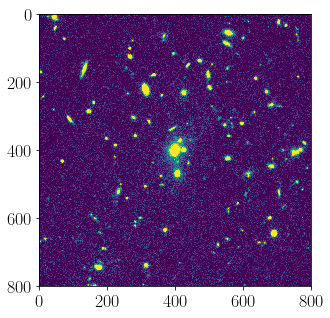

455
ID: 455
ttdf[ID] 0     529
1     455
2     661
3    1036
Name: ID, dtype: int64


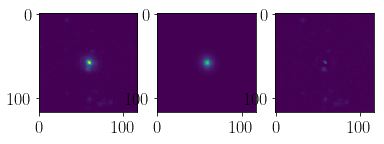

661
ID: 661
ttdf[ID] 0     529
1     455
2     661
3    1036
Name: ID, dtype: int64
No model fit found. Plotting raw image from /cutout.fits
No cutout.fits file found...


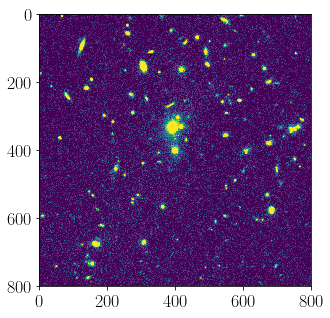

1036
ID: 1036
ttdf[ID] 0     529
1     455
2     661
3    1036
Name: ID, dtype: int64


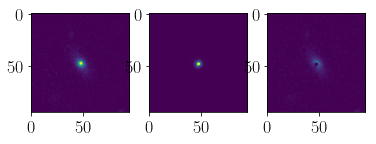

In [145]:
for i in new_df['ID'][0:10]:
    print i 
    plot_by_ID(i,save_name=save_name)